# Analysis and Visualization of Complex Agro-Environmental Data
---
## Regression

### 1. Run simple linear regression

Simple linear regression is the simplest form of regression analysis. It is also commonly used in Exploratory Data Analysis when we are interested in exploring if a given continuous response variable is affected by other independent (or predictor) variables. When we aim at modelling a response continuous variable with multiple linear regression using a big set of potential candidate variables, simple regression analysis is often used as a first filter to select a subset of candidate variables. Again, significant effect of a predictor on the response variable does not imply causation; but causation implies a significant an effect of a predictor on the response. Along with correlation analysis, regression is also important as a basis to establish hypothesis to be tested with more elaborated confirmatory statistics.

Linear regression models may be run with several python modules such as SciPy, statsmodel and scikit-learn.

##### Example with the Iris dataset

In [22]:
# import the packages we are going to be using
import numpy as np # for getting our distribution
import pandas as pd # to handle data frames
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
from scipy import stats # to compute statistics

# import data ('iris' dataset)
data = pd.read_csv('pc_tc_labour.csv')
print(data)

   NutsID  level_ID                  region_name  year pc_name tc_name  \
0     111         3                   Alto Minho  1989   Total   Total   
1     111         3                   Alto Minho  1999   Total   Total   
2     111         3                   Alto Minho  2009   Total   Total   
3     111         3                   Alto Minho  2019   Total   Total   
4     112         3                       Cávado  1989   Total   Total   
..    ...       ...                          ...   ...     ...     ...   
95    200         3   Região Autónoma dos Açores  2019   Total   Total   
96    300         3  Região Autónoma da Madeira   1989   Total   Total   
97    300         3  Região Autónoma da Madeira   1999   Total   Total   
98    300         3  Região Autónoma da Madeira   2009   Total   Total   
99    300         3  Região Autónoma da Madeira   2019   Total   Total   

    pc_area  tc_area  labour_value  labour_type_id  ratio_pc_tc  
0      7040    69228         51652           

Lets regress the variable 'sepal width' against 'petal width'

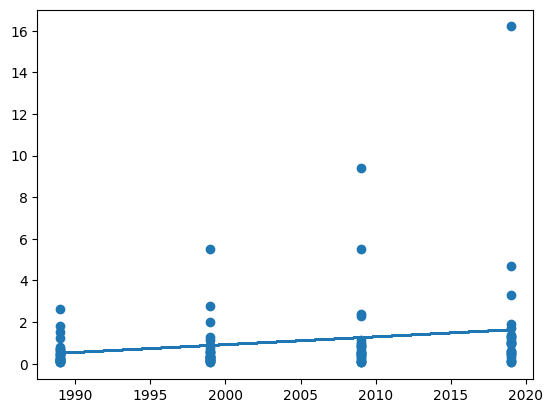

In [27]:
# Use the `Iris`dataset to relate sepal width as function of petal width

x=data["year"]
y=data["ratio_pc_tc"]

# Execute a method that returns some important key values of Linear Regression:
slope, intercept, r, p, std_err = stats.linregress(x, y)

# plot data with fitted line
def myfunc(x):
  return intercept + slope * x # function that returns fitted values

mymodel = list(map(myfunc, x)) # apply function to each x value

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

The overal relationship tends to be negative. Now we will test the null hypothesis that the slope of relationship is zero

In [24]:
# Run the regression test
print('slope estimate=%.2f, r=%.2f, p=%.6f' % (slope, r, p))
alpha=0.05
if p <= alpha:
 print('reject H0 that the slope of the relationship is = 0')
else:
 print('fail to reject H0 that the slope of the relationship is = 0')

slope estimate=0.62, r=0.39, p=0.000068
reject H0 that the slope of the relationship is = 0


The **statsmodel** module provides a more complete output using much less code:

In [25]:
import statsmodels.api as sm

x2 = x
x2 = sm.add_constant(x2) # adding a constant (Intercept)

model = sm.OLS(y, x2).fit()
predictions = model.predict(x2) 

print_model = model.summary()
print(print_model)

# Some notes on model outputs:
# Omnibus tests are a kind of statistical test. They test whether the explained variance in a 
# set of data is significantly greater than the unexplained variance, overall. One example is the F-test in the analysis of variance.

# The Durbin Watson statistic is a test for autocorrelation in a regression model's output. 
# The statistic ranges from zero to four, with a value of 2.0 indicating zero autocorrelation.

# Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution.

                            OLS Regression Results                            
Dep. Variable:                tc_area   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     17.30
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           6.85e-05
Time:                        18:53:06   Log-Likelihood:                -1208.0
No. Observations:                 100   AIC:                             2420.
Df Residuals:                      98   BIC:                             2425.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.231e+04   6278.802      5.147      0.0

There are other modules that have implemented regression analysis, such as the **sklearn** module:

In [11]:
# Now using sklearn

import pandas as pd
from sklearn import linear_model

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

ValueError: Expected 2D array, got 1D array instead:
array=[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
 0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.1 0.2
 0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
 1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
 1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
 1.2 1.4 1.2 1.  1.3 1.2 1.3 1.3 1.1 1.3 2.5 1.9 2.1 1.8 2.2 2.1 1.7 1.8
 1.8 2.5 2.  1.9 2.1 2.  2.4 2.3 1.8 2.2 2.3 1.5 2.3 2.  2.  1.8 2.1 1.8
 1.8 1.8 2.1 1.6 1.9 2.  2.2 1.5 1.4 2.3 2.4 1.8 1.8 2.1 2.4 2.3 1.9 2.3
 2.5 2.3 1.9 2.  2.3 1.8].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

As shown by the scatter plot above, it seems that the data is grouped, which are probably related to the different species present in the dataset. Let's check that.

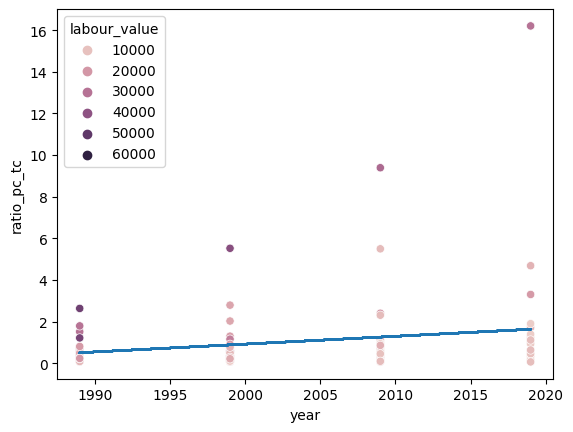

In [29]:
# same scatterplot but showing data per species
sns.scatterplot(x=x, y=y, hue=data["labour_value"])
plt.plot(x, mymodel)
plt.show()

We confirmed that the groups correspond to species. We also can see that the relationship within each group is positive, and not negative, as the overall data suggests. We can plot the regression line for each group running the following code:

In [ ]:
# Plot by group
sns.lmplot(x='petal_width', y='sepal_width', hue="species", data=data)

Within each group, the relationship is clearly positive, despite an overall negative relationship. This paradox is called the `Simpson's Paradox` (nothing to do with the Simpson's series), as described by Simpson (1951).

It is therefore more appropriate to run the regression to each species.

In [ ]:
# Run same regression but only for the species 'versicolor'

x=data[(data['species']=='versicolor')]['petal_width']
y=data[(data['species']=='versicolor')]['sepal_width']

# Execute a method that returns some important key values of Linear Regression:
slope, intercept, r, p, std_err = stats.linregress(x, y)

# plot data with fitted line
def myfunc(x):
  return intercept + slope * x # function that returns fitted values

mymodel = list(map(myfunc, x)) # apply function to each x value

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [ ]:
# Model output table
x = sm.add_constant(x) # adding a constant (Intercept)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

### 2. Run multiple linear regression

When running multiple linear regression, the model will contain more than one predictor variable. The single effect of a variable may change in the presence of other variables. In the following example we will use the `Iris` dataset to regress the sepal length as a function of the remaining variables

In [30]:
y=data["ratio_pc_tc"]
x=data[["year"]]

x = sm.add_constant(x) # adding a constant (Intercept)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            ratio_pc_tc   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     4.455
Date:                Thu, 15 Jun 2023   Prob (F-statistic):             0.0373
Time:                        19:01:57   Log-Likelihood:                -209.65
No. Observations:                 100   AIC:                             423.3
Df Residuals:                      98   BIC:                             428.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -74.1880     35.653     -2.081      0.0

We may also use the formula interface of statsmodels (like in R) to compute regression with multiple predictors. We just need append the predictors to the formula via a '+' symbol.

In [32]:
# import formula api as alias smf 
import statsmodels.formula.api as smf

# formula: response ~ predictor1 + predictor2 + ...
model = smf.ols(formula='ratio_pc_tc ~ pc_area + tc_area + labour_value', data=data).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            ratio_pc_tc   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     30.28
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           7.28e-14
Time:                        19:02:56   Log-Likelihood:                -178.58
No. Observations:                 100   AIC:                             365.2
Df Residuals:                      96   BIC:                             375.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.5397      0.332      1.624   

We will now plot the partial response (or dependence) plots, which represents the effect of each variable in the presence of the remaining. This effect may be very different from the single effect, i.e., when running simple linear regression with each predictor.

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


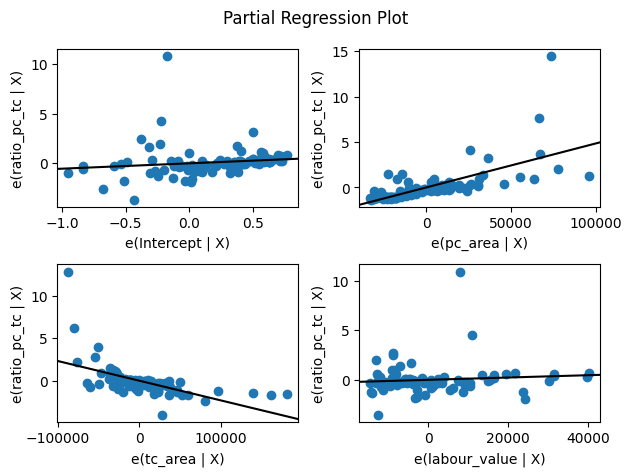

In [33]:
fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.0)

The chart below shows how the single effect of 'Petal width' is very different from its joint effect with the remaining variables.

eval_env: 1
eval_env: 1


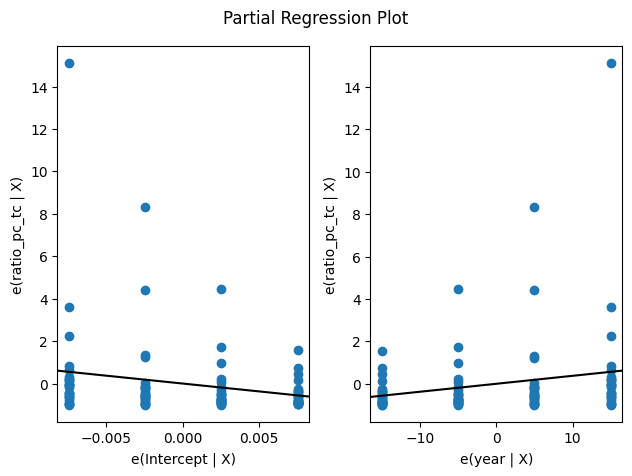

In [34]:
# formula: response ~ predictor
model2 = smf.ols(formula='ratio_pc_tc ~ year ', data=data).fit()
fig = sm.graphics.plot_partregress_grid(model2)
fig.tight_layout(pad=1.0)

The next chart uses the plot_fit function to plot the fitted values versus a chosen independent variable. It includes prediction confidence intervals and optionally plots the true dependent variable. Let's check the fit plot for each predictor.


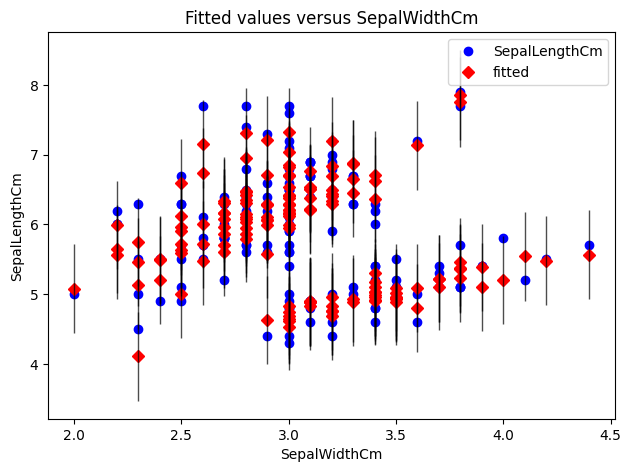

In [18]:
fig = sm.graphics.plot_fit(model, "SepalWidthCm")
fig.tight_layout(pad=1.0)

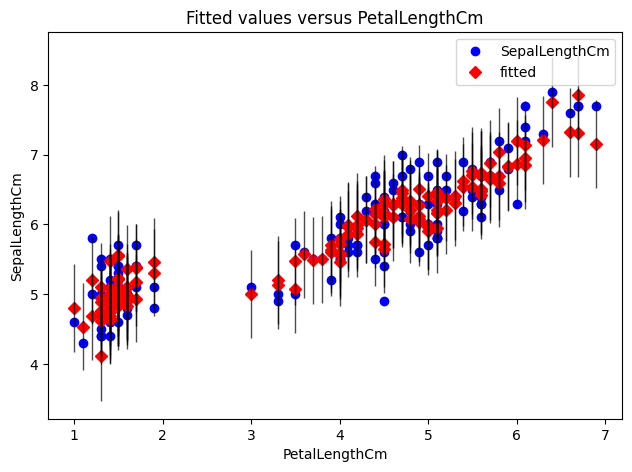

In [19]:
fig = sm.graphics.plot_fit(model, "PetalLengthCm")
fig.tight_layout(pad=1.0)

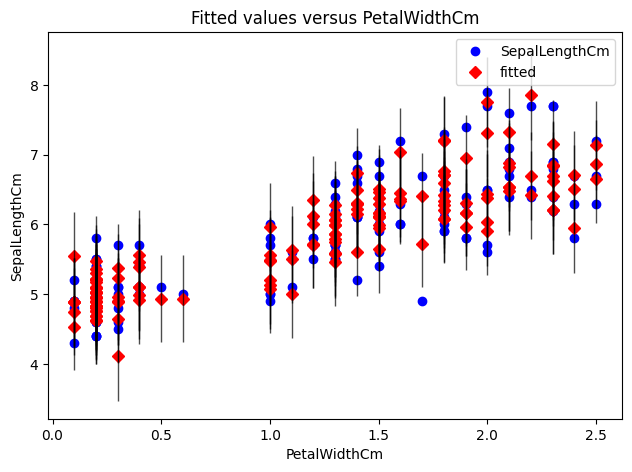

In [20]:
fig = sm.graphics.plot_fit(model, "PetalWidthCm")
fig.tight_layout(pad=1.0)

An important step when running regression is to perform a regression diagnostic to check that the assumptions are met.

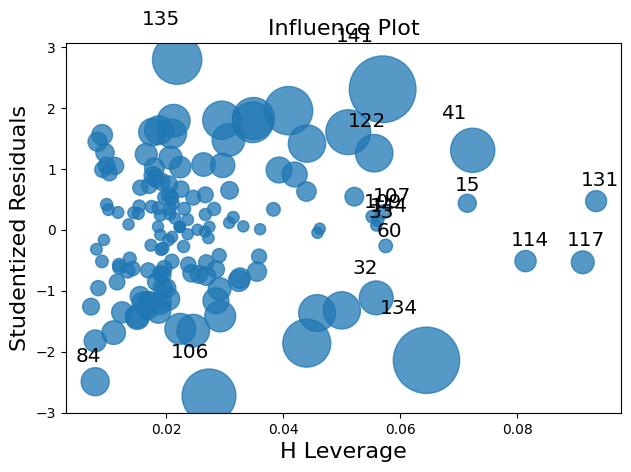

In [21]:
# Diagnostic plots
# Influence plot
fig = sm.graphics.influence_plot(model, criterion="cooks")
fig.tight_layout(pad=1.0)

The *statsmodel* has no specific function to run the most common diagnostic plots, but it provides a code to generate such function. Check below.

In [17]:
# Code to produce functions to run diagnostic plots  
# https://www.statsmodels.org/dev/examples/notebooks/generated/linear_regression_diagnostics_plots.html

# base code
import numpy as np
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type
import statsmodels

style_talk = 'seaborn-talk'    #refer to plt.style.available

class Linear_Reg_Diagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Author:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.
    """


    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)


    def __call__(self, plot_context='seaborn-paper'):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(ax=ax[1,1])
            plt.show()

        self.vif_table()
        return fig, ax



    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.sort(residual_abs))
        abs_resid_top_3 = abs_resid[:3]
        for i, _ in enumerate(abs_resid_top_3):
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax


    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for r, i in enumerate(abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(np.flip(QQ.theoretical_quantiles, 0)[r], self.residual_norm[i]),
                ha='right', color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')
        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        xtemp, ytemp = self.__cooks_dist_line(0.5) # 0.5 line
        ax.plot(xtemp, ytemp, label="Cook's distance", lw=1, ls='--', color='red')
        xtemp, ytemp = self.__cooks_dist_line(1) # 1 line
        ax.plot(xtemp, ytemp, lw=1, ls='--', color='red')

        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        ax.legend(loc='upper right')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        print(vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y

Now we can run the diagnostic plots to our model:

In [ ]:
# Run diagnostic plots
cls = Linear_Reg_Diagnostic(model)
fig, ax = cls()

## References

Linear regression diagnostics https://www.statsmodels.org/dev/examples/notebooks/generated/linear_regression_diagnostics_plots.html

Ordinary Least Squares https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html

Regression Plots https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html

 Simpson, Edward H. (1951). The Interpretation of Interaction in Contingency Tables. *Journal of the Royal Statistical Society*, Series B. 13: 238–241.